# Que-3, a_part

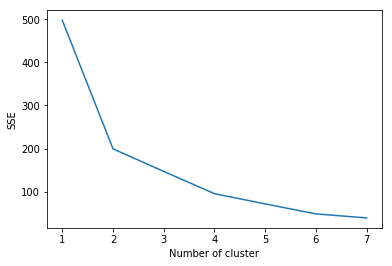

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data = np.genfromtxt ('/home/sneha/aml_ass4/dataset1.txt', delimiter=" ")
data = pd.DataFrame(data)
sse = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.savefig('optimal_k_dataset1')
plt.show()

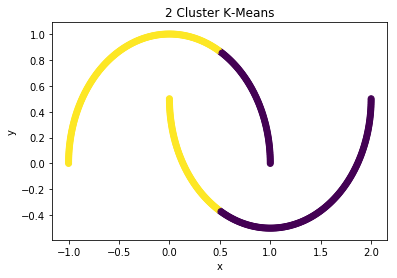

In [19]:
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(data)
data["clusters"] = kmeans.labels_
data.columns=['x','y','clusters']
from sklearn.decomposition import PCA
X=data[['x']]
Y=data['y']
import pylab as pl
kmeans=KMeans(n_clusters=2)
kmeansoutput=kmeans.fit(X)
pl.figure('2 Cluster K-Means')
pl.scatter(X, Y,c=kmeansoutput.labels_)
pl.xlabel('x')
pl.ylabel('y')
pl.title('2 Cluster K-Means')
plt.savefig('k_means_dataset1')
pl.show()


# Que-3, b_part

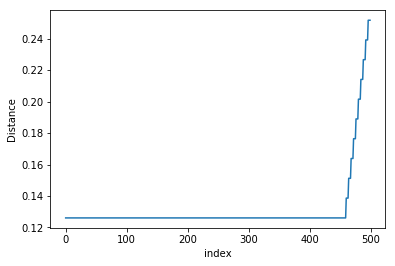

In [20]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
li=[]
for i in range(500):
    li.append(i)
Dataset1=np.genfromtxt ('/home/sneha/aml_ass4/dataset1.txt', delimiter=" ")
Dataset1=pd.DataFrame(Dataset1)
Dataset1.columns=['x','y']
DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Dataset1, 'euclidean'))
DistanceMatrix=np.array(DistanceMatrix)
Sorted_Distance_Matrix= np.sort(DistanceMatrix,axis=1)
y=list(np.sort(Sorted_Distance_Matrix[:,20]))
plt.figure()
plt.plot(li,y)
plt.xlabel('index')
plt.ylabel('Distance')
plt.savefig('dbscan_data1')
plt.show()


In [21]:
import scipy
Dataset=np.array(data[['x','y']])
def DBscan(Dataset, Epsilon,MinumumPoints):
    m,n=Dataset.shape
    Visited=np.zeros(m)
    PointClusterNumber=np.zeros(m)
    ClusterNumber=1
    PN=[]
    DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Dataset, 'euclidean'))
    for i in xrange(m):
        if Visited[i]==0:
            Visited[i]=1
            PN=np.where(DistanceMatrix[i]<Epsilon)[0]
            if len(PN)<MinumumPoints:
                print(' ')
            else:
                PointClusterNumber[i]=ClusterNumber
                PN=list(PN)    
                ExpandClsuter( PN,MinumumPoints,DistanceMatrix,Epsilon,Visited,PointClusterNumber,ClusterNumber)
                ClusterNumber=ClusterNumber+1        
    return PointClusterNumber
 
 
 
def ExpandClsuter(PointNeighbors,MinumumPoints,DistanceMatrix,Epsilon,Visited,PointClusterNumber,ClusterNumber):
#     DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Dataset, 'euclidean'))
    for i in PointNeighbors:
        if Visited[i]==0:
            Visited[i]=1
            Neighbors=np.where(DistanceMatrix[i]<Epsilon)[0]
            if len(Neighbors)>=MinumumPoints:
                for j in Neighbors:
                    try:
                        PointNeighbors.index(j)
                    except ValueError:
                        PointNeighbors.append(j)
                    
        if PointClusterNumber[i]==0:
            PointClusterNumber[i]=ClusterNumber
    return


[1. 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1.
 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2. 1. 2. 1. 2.
 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1.
 1. 1. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 2. 2. 1. 1.
 1. 2. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1.
 1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2.
 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2. 2. 1.
 2. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1.
 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 1. 1. 2.
 2. 1. 2. 2. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2.
 1. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 2.
 2. 1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 1. 1.
 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 2.
 2. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 1. 2. 2.

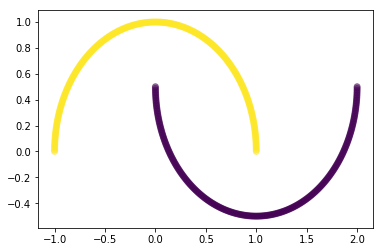

In [22]:
 
Epsilon=.13
MinumumPoints=20
result =DBscan(Dataset,Epsilon,MinumumPoints)
print result
colors = [int(i % 23) for i in result]
plt.scatter(data['x'],data['y'], alpha =  0.5 ,c=colors)
plt.savefig('dbscan_dataset1')
      
plt.show()

# Que-3, c_part in report

# Que-3, d_part

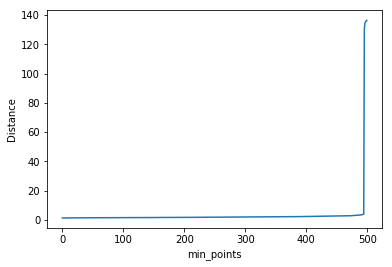

In [24]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
li=[]
for i in range(500):
    li.append(i)
Dataset2=np.genfromtxt ('/home/sneha/aml_ass4/dataset2.txt', delimiter=" ")
Dataset2=pd.DataFrame(Dataset2)
Dataset2.columns=['x','y']
DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Dataset2, 'euclidean'))
DistanceMatrix=np.array(DistanceMatrix)
Sorted_Distance_Matrix= np.sort(DistanceMatrix,axis=1)
y=list(np.sort(Sorted_Distance_Matrix[:,100]))
plt.figure()
plt.plot(li,y)
plt.xlabel('min_points')
plt.ylabel('Distance')
plt.savefig('dbscan_data2')
plt.show()


 
 
 
 
 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

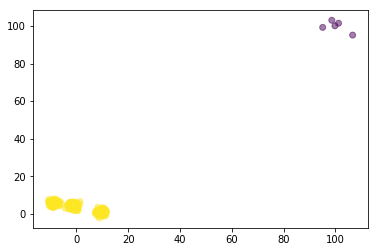

In [25]:
result =DBscan(Dataset2,10,100)
print result
colors = [int(i % 23) for i in result]
plt.scatter(Dataset2['x'],Dataset2['y'], alpha =  0.5 ,c=colors)
plt.savefig('dbscan_dataset2')
plt.show()

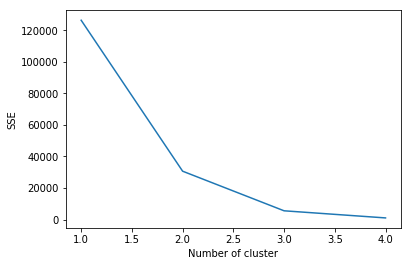

In [26]:
sse = {}
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(Dataset2)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.savefig('k_optimal_dataset2')
plt.show()

(500, 1)
(500,)


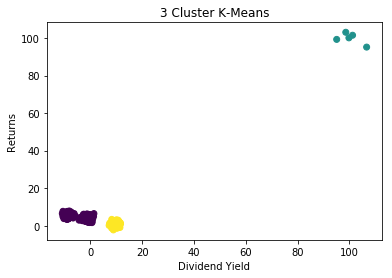

In [27]:
from sklearn.decomposition import PCA
X=Dataset2[['x']]
Y=Dataset2['y']
print(X.shape)
print(Y.shape)

import pylab as pl
kmeans=KMeans(n_clusters=3)

kmeansoutput=kmeans.fit(X)

pl.figure('2 Cluster K-Means')

pl.scatter(X, Y,c=kmeansoutput.labels_)

pl.xlabel('Dividend Yield')

pl.ylabel('Returns')

pl.title('3 Cluster K-Means')
plt.savefig('kmeans_dataset2')

pl.show()